![alt text](images/BostonHousing.png "comparators")
##  Boston Housing Data

Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

Relevant Information:

   Concerns housing values in suburbs of Boston.

Number of Instances: 506

Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

Attribute Information:

- CRIM      per capita crime rate by town
- ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS     proportion of non-retail business acres per town
- CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX       nitric oxides concentration (parts per 10 million)
- RM        average number of rooms per dwelling
- AGE       proportion of owner-occupied units built prior to 1940
- DIS       weighted distances to five Boston employment centres
- RAD       index of accessibility to radial highways
- TAX       full-value property-tax rate per 10,000
- PTRATIO   pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

Missing Attribute Values:  None.




### Objectives:

Regression
- Simple linear regression using Scitkit-Learn
- Graphics using Matplotlib with plots and scatter plots
- Simple Liner Regression using statsmodels api
- Multiple Regression using statsmodels formula.api
- Cross Validation using k-folds

In [6]:
%matplotlib inline


import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
from sklearn.utils import shuffle
from sklearn import datasets, linear_model
import pandas as pd
plt.style.use('fivethirtyeight')

In [7]:
boston = datasets.load_boston() # Call the boston dataset from sklearn
columns = boston.feature_names
df_boston = pd.DataFrame(boston.data, columns=columns) # load the dataset as a pandas data frame
y = boston.target # define the target variable (dependent variable) as y

In [8]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
y

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [10]:
boston_rooms = df_boston[[5]]

In [11]:
boston_rooms.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [12]:
y = y.reshape(-1,1)

In [13]:
y

array([[ 24. ],
       [ 21.6],
       [ 34.7],
       [ 33.4],
       [ 36.2],
       [ 28.7],
       [ 22.9],
       [ 27.1],
       [ 16.5],
       [ 18.9],
       [ 15. ],
       [ 18.9],
       [ 21.7],
       [ 20.4],
       [ 18.2],
       [ 19.9],
       [ 23.1],
       [ 17.5],
       [ 20.2],
       [ 18.2],
       [ 13.6],
       [ 19.6],
       [ 15.2],
       [ 14.5],
       [ 15.6],
       [ 13.9],
       [ 16.6],
       [ 14.8],
       [ 18.4],
       [ 21. ],
       [ 12.7],
       [ 14.5],
       [ 13.2],
       [ 13.1],
       [ 13.5],
       [ 18.9],
       [ 20. ],
       [ 21. ],
       [ 24.7],
       [ 30.8],
       [ 34.9],
       [ 26.6],
       [ 25.3],
       [ 24.7],
       [ 21.2],
       [ 19.3],
       [ 20. ],
       [ 16.6],
       [ 14.4],
       [ 19.4],
       [ 19.7],
       [ 20.5],
       [ 25. ],
       [ 23.4],
       [ 18.9],
       [ 35.4],
       [ 24.7],
       [ 31.6],
       [ 23.3],
       [ 19.6],
       [ 18.7],
       [ 16. ],
       [

In [14]:
type(y)

numpy.ndarray

In [15]:
df_rooms = df_boston[[5]]

In [16]:
df_rooms.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


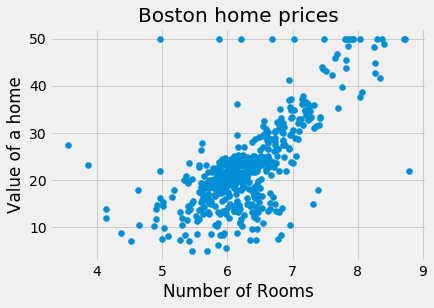

In [17]:
plt.scatter(df_rooms, y)
plt.ylabel('Value of a home')
plt.xlabel('Number of Rooms')
plt.title('Boston home prices')

In [18]:
plt.show()

In [19]:
reg = linear_model.LinearRegression()

In [20]:
reg.fit(df_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

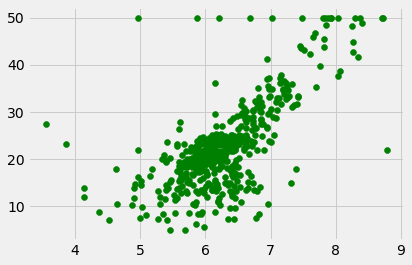

In [21]:
plt.scatter(df_rooms, y, color='green')

In [22]:
predictions = reg.predict(df_rooms)

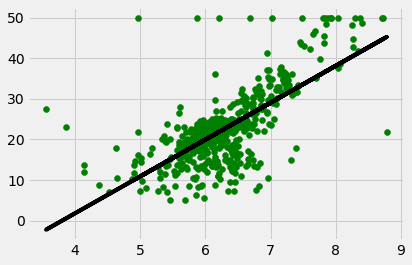

In [23]:
plt.scatter(df_rooms, y, color='green')
plt.plot(df_rooms, predictions, color='black')

In [24]:
plt.show()

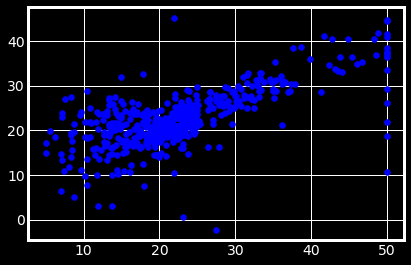

In [25]:
plt.style.use('dark_background')
plt.scatter(y, predictions, color='blue')

In [26]:
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df_boston.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [29]:
df_boston['Price'] = boston.target

In [30]:
df_boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
X = df_boston.drop('Price', axis=1)
Y = df_boston['Price']

In [33]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [36]:
X_train.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
360,4.54192,0.0,18.10,0.0,0.770,6.398,88.0,2.5182,24.0,666.0,20.2,374.56,7.79
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
405,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
185,0.06047,0.0,2.46,0.0,0.488,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15
60,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8.0,284.0,19.7,395.11,13.15


In [37]:
Y_train.head(15)

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
360    25.0
3      33.4
405     5.0
185    29.6
60     18.7
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
Name: Price, dtype: float64

In [38]:
reg_all = linear_model.LinearRegression()

In [39]:
reg_all.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
y_pred = reg_all.predict(X_test)

In [41]:
reg_all.score(X_test, Y_test)

0.71092035863263181

## xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
## Multiple Regression

using statsmodel for multiple independent variables


In [42]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [43]:
results = sm.OLS(df_rooms, y).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RM   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Mon, 13 Nov 2017   Prob (F-statistic):          3.74e-256
Time:                        22:42:36   Log-Likelihood:                -1065.2
No. Observations:                 506   AIC:                             2132.
Df Residuals:                     505   BIC:                             2137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.2467      0.004     67.930      0.000         0.240     0.254
==============================================================================
Omnibus:                       82.770   Durbin-Watson:                   0.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.829
Skew:                          -0.931   Prob(JB):                     5.34e-35
Kurtosis:                       5.004   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
results = sm.OLS(X_test['RM'], Y_test).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RM   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1366.
Date:                Mon, 13 Nov 2017   Prob (F-statistic):           1.50e-77
Time:                        22:42:36   Log-Likelihood:                -318.22
No. Observations:                 152   AIC:                             638.4
Df Residuals:                     151   BIC:                             641.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Price          0.2558      0.007     36.963      0.000         0.242     0.270
==============================================================================
Omnibus:                       35.713   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.697
Skew:                          -1.119   Prob(JB):                     2.43e-14
Kurtosis:                       5.211   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
est = smf.ols(formula='Price ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=df_boston).fit()

In [46]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 13 Nov 2017   Prob (F-statistic):          6.95e-135
Time:                        22:42:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
## Lasso Regression

In [47]:
from sklearn.linear_model import Lasso

In [48]:
lasso = Lasso(alpha=0.1, normalize=True)

In [49]:
lasso.fit(X_train, Y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
lasso_pred = lasso.predict(X_test)

In [51]:
lasso.score(X_test, Y_test)

0.59502292925878275

In [52]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [53]:
names = df_boston.columns

In [54]:
names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [55]:
lasso_coef = lasso.fit(X, y).coef_

In [56]:
lasso_coef

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.95469429, -0.        ,  0.        , -0.        , -0.        ,
       -0.24795828,  0.        , -0.42817442])

In [57]:
df_lasso = pd.DataFrame([lasso_coef])

In [58]:
df_lasso

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.0,0.0,-0.0,0.0,-0.0,2.954694,-0.0,0.0,-0.0,-0.0,-0.247958,0.0,-0.428174


In [59]:
df_lasso.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [60]:
df_lasso

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.0,0.0,-0.0,0.0,-0.0,2.954694,-0.0,0.0,-0.0,-0.0,-0.247958,0.0,-0.428174


## xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
## Ridge Regression

In [68]:
from sklearn.linear_model import Ridge

In [69]:
ridge = Ridge(alpha=0.1, normalize=True)

In [70]:
ridge.fit(X_train, Y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [71]:
ridge_pred = ridge.predict(X_test)

In [73]:
ridge.score(X_test, Y_test)

0.69955650271004155

In [76]:
ridge_coef = ridge.fit(X, y).coef_

In [78]:
df_ridge = pd.DataFrame(ridge_coef)

In [79]:
df_ridge.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [84]:
df_ridge

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.083192,0.030123,-0.044929,2.92103,-10.765073,4.020305,-0.004538,-1.031814,0.130141,-0.00496,-0.832945,0.009027,-0.458224


In [85]:
import seaborn as snscolormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_boston.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

SyntaxError: invalid syntax (<ipython-input-85-d625a59c1099>, line 1)

## xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
## Decision Tree Regressor and Adaboost

In [61]:
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [62]:
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(Y_test, y_pred_dt)
evs = explained_variance_score(Y_test, y_pred_dt)

In [63]:
print('\n#### Decision Tree performance ####')
print('Mean squared error =', round(mse, 2))
print('Explained variance score =', round(evs, 2))


#### Decision Tree performance ####
Mean squared error = 14.35
Explained variance score = 0.81


In [64]:
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
ab_regressor.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

In [65]:
y_pred_ab = ab_regressor.predict(X_test)
mse_a = mean_squared_error(Y_test, y_pred_ab)
evs_a = explained_variance_score(Y_test, y_pred_ab)


print('\n#### AdaBoost performance ####')
print('Mean squared error =', round(mse_a, 2))
print('Explained variance score =', round(evs_a, 2))


#### AdaBoost performance ####
Mean squared error = 13.49
Explained variance score = 0.82


In [66]:
def plot_feature_importances(feature_importances, title, feature_names):
    # Normalize the importance values
    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    # Sort the values and flip them
    index_sorted = np.flipud(np.argsort(feature_importances))

    # Arrange the X ticks
    pos = np.arange(index_sorted.shape[0]) + 0.5

    # Plot the bar graph
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

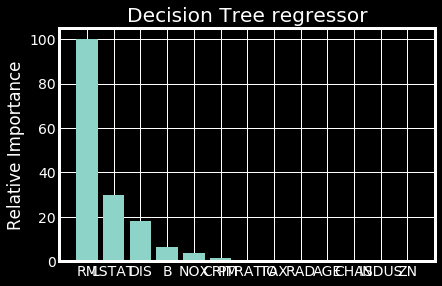

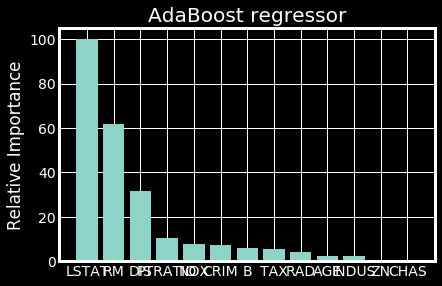

In [67]:
plot_feature_importances(dt_regressor.feature_importances_,'Decision Tree regressor', boston.feature_names)
plot_feature_importances(ab_regressor.feature_importances_,'AdaBoost regressor', boston.feature_names)